# Bank Statements (P1- BankStatements.json)

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the JSON data
with open('P1- BankStatements.json') as file:
    data = json.load(file)
    
data

{'Account': {'type': 'deposit',
  'maskedAccNumber': 'XXXX6461',
  'version': '1.1',
  'linkedAccRef': '02f28b8d-d8a3-43d7-88c6-5fabb2e51541',
  'xmlns': 'http://api.rebit.org.in/FISchema/deposit',
  'xsi:schemaLocation': 'http://api.rebit.org.in/FISchema/deposit.xsd',
  'xmlns:xsi': 'http://www.w3.org/2001/XMLSchema-instance',
  'Profile': {'Holders': {'type': 'SINGLE',
    'Holder': {'name': 'Arun Shakya',
     'dob': '2000-06-09',
     'mobile': '8429489761',
     'nominee': 'REGISTERED',
     'address': '',
     'email': 'NA',
     'pan': 'FORM60',
     'ckycCompliance': 'true'}}},
  'Summary': {'currentBalance': '761.41',
   'currency': 'INR',
   'exchgeRate': '1',
   'balanceDateTime': '2024-05-30T03:05:12+05:30',
   'type': 'SAVINGS',
   'branch': 'AMETHI JADID, UP',
   'ifscCode': 'BARB0AMEJAD',
   'micrCode': '209012004',
   'openingDate': '2020-11-24',
   'currentODLimit': '0.00',
   'drawingLimit': '0.00',
   'status': 'ACTIVE',
   'Pending': {'amount': '0.0'}},
  'Transacti

## 1.  Transaction Analysis: 
   - What is the total number of transactions made over the year?
   - What is the distribution of transaction amounts (e.g., small vs. large transactions)?(define small and large transactions by yourself)
   - Analyze the frequency of different transaction types (debit vs. credit).


In [3]:
# Extract transactions
transactions = data['Account']['Transactions']['Transaction']

In [4]:
# Create a DataFrame
df = pd.DataFrame(transactions)

In [5]:
df.head(15)

,type,mode,amount,currentBalance,transactionTimestamp,valueDate,txnId,narration,reference
0,DEBIT,CARD,100.0,2180.80,2023-06-27T09:40:19+05:30,2023-06-27,S39488701,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
1,DEBIT,CARD,170.0,2010.80,2023-06-28T09:51:57+05:30,2023-06-28,S76862822,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
2,DEBIT,CARD,500.0,1510.80,2023-07-26T10:04:00+05:30,2023-07-26,S31451661,PRCR/MS NEHA FILLING STATIO/FARRUKHAB,NA
3,CREDIT,OTHERS,15.0,1525.80,2023-08-06T11:10:38+05:30,2023-07-31,S66463256,51888100006461IntPd01-05-2023 to 31-07-2023,NA
4,DEBIT,ATM,1000.0,525.80,2023-08-07T17:13:13+05:30,2023-08-07,S18475743,ATM/CASH/321917012791/XXXXXXXXXXXX8896,NA
5,DEBIT,UPI,1.0,524.80,2023-08-22T08:05:06+05:30,2023-08-22,S82724622,UPI/323444770475/080506/UPI/8795417446ybl/Paym,NA
6,CREDIT,UPI,3000.0,3524.80,2023-08-22T11:49:13+05:30,2023-08-22,S90667553,UPI/323441197152/114914/UPI/8795417446ybl/Paym,NA
7,CREDIT,UPI,300.0,3824.80,2023-08-22T12:20:04+05:30,2023-08-22,S92051775,UPI/323457106254/122004/UPI/9264998949barodamp,NA
8,DEBIT,UPI,1200.0,2624.80,2023-08-23T08:17:48+05:30,2023-08-23,S20566812,UPI/323568910825/081748/UPI/8795417446ybl/Paym,NA
9,CREDIT,UPI,400.0,3024.80,2023-08-23T10:51:21+05:30,2023-08-23,S25232032,UPI/323567840697/105122/UPI/kimoroybl/Payment,NA


In [6]:
df.info() # checking the data type of each column

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 985 entries, 0 to 984
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   type                  985 non-null    object
 1   mode                  985 non-null    object
 2   amount                985 non-null    object
 3   currentBalance        985 non-null    object
 4   transactionTimestamp  985 non-null    object
 5   valueDate             985 non-null    object
 6   txnId                 985 non-null    object
 7   narration             985 non-null    object
 8   reference             985 non-null    object
dtypes: object(9)
memory usage: 69.4+ KB


In [7]:
# Convert amount and currentBalance to float
df['amount'] = df['amount'].astype(float)
df['currentBalance'] = df['currentBalance'].astype(float)

In [8]:
# Convert transactionTimestamp to datetime
df['transactionTimestamp'] = pd.to_datetime(df['transactionTimestamp'])


In [9]:
# Total number of transactions
total_transactions = len(df)

In [10]:
# Distribution of transaction amounts
df['transaction_size'] = df['amount'].apply(lambda x: 'Small' if x < 1000 else 'Large')
transaction_distribution = df['transaction_size'].value_counts()

In [11]:
# Frequency of transaction types
transaction_types = df['type'].value_counts()


In [12]:
# Plotting
plt.figure(figsize=(14, 6))


<Figure size 1400x600 with 0 Axes>

<Figure size 1400x600 with 0 Axes>

Text(0, 0.5, 'Count')

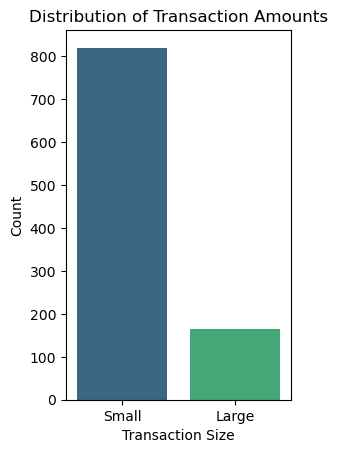

In [13]:
# Distribution of transaction amounts
plt.subplot(1, 2, 1)
sns.countplot(data=df, x='transaction_size', palette='viridis')
plt.title('Distribution of Transaction Amounts')
plt.xlabel('Transaction Size')
plt.ylabel('Count')


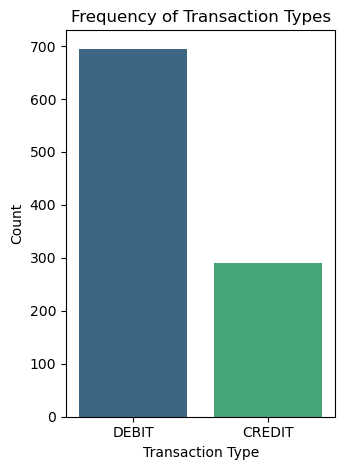

In [14]:
# Frequency of transaction types
plt.subplot(1, 2, 2)
sns.countplot(data=df, x='type', palette='viridis')
plt.title('Frequency of Transaction Types')
plt.xlabel('Transaction Type')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

In [15]:
# Print results
print(f'Total number of transactions: {total_transactions}')
print(f'\nDistribution of transaction amounts:\n{transaction_distribution}')
print(f'\nFrequency of transaction types:\n{transaction_types}')

Total number of transactions: 985

Distribution of transaction amounts:
transaction_size
Small    820
Large    165
Name: count, dtype: int64

Frequency of transaction types:
type
DEBIT     695
CREDIT    290
Name: count, dtype: int64


## 2.  Balance Analysis: 
   - What is the trend of the account balance over time?
   - Identify any periods with significant changes in the account balance.


In [16]:
# Sort by transactionTimestamp
df.sort_values(by='transactionTimestamp', inplace=True)

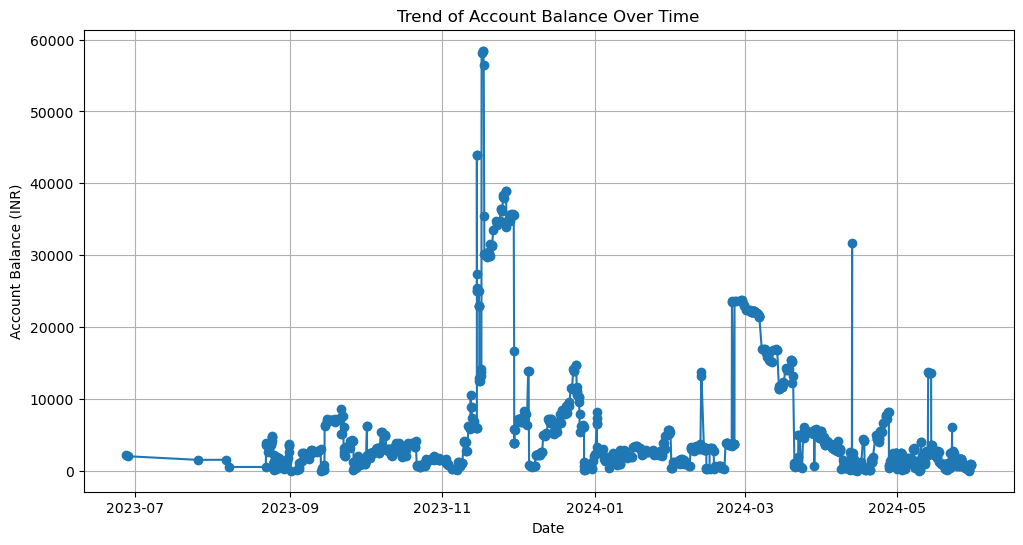

In [17]:
# Trend of account balance over time
plt.figure(figsize=(12, 6))
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-')
plt.title('Trend of Account Balance Over Time')
plt.xlabel('Date')
plt.ylabel('Account Balance (INR)')
plt.grid(True)
plt.show()

In [18]:
# Identify significant changes in account balance
df['balance_change'] = df['currentBalance'].diff().abs() 
significant_changes = df[df['balance_change'] > df['balance_change'].quantile(0.95)]

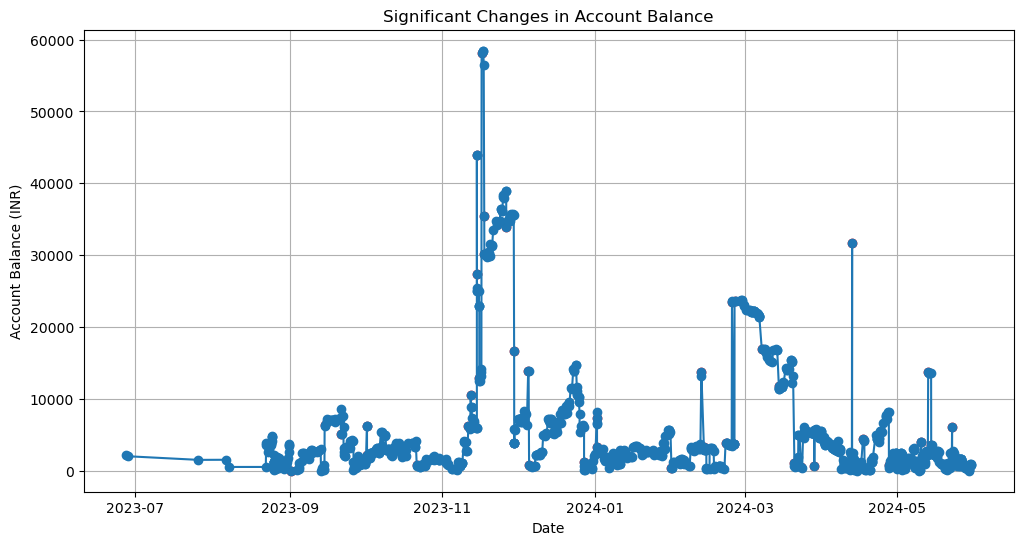

In [19]:
# Plotting significant changes
plt.figure(figsize=(12, 6))
plt.plot(df['transactionTimestamp'], df['currentBalance'], marker='o', linestyle='-')
plt.scatter(significant_changes['transactionTimestamp'], significant_changes['currentBalance'], color='red')
plt.title('Significant Changes in Account Balance')
plt.xlabel('Date')
plt.ylabel('Account Balance (INR)')
plt.grid(True)
plt.show()

In [20]:
# Print results
print(f'Total number of transactions: {len(df)}')
print(f'\nSignificant changes in account balance:\n{significant_changes[["transactionTimestamp", "currentBalance", "balance_change"]]}')

Total number of transactions: 985

Significant changes in account balance:
         transactionTimestamp  currentBalance  balance_change
51  2023-09-01 10:42:42+05:30            0.80          3500.0
78  2023-09-14 21:14:51+05:30         6339.80          5500.0
94  2023-09-21 13:05:06+05:30         5150.80          3500.0
136 2023-10-01 19:02:22+05:30         6238.80          4550.0
138 2023-10-01 19:51:09+05:30         2237.80          4000.0
202 2023-10-21 16:17:48+05:30          837.80          3300.0
259 2023-11-11 09:53:51+05:30         6180.80          3440.0
265 2023-11-12 06:36:51+05:30        10560.80          4730.0
275 2023-11-14 18:31:11+05:30        43892.80         37999.0
277 2023-11-14 18:49:41+05:30        27391.80         16500.0
285 2023-11-15 17:48:21+05:30        12970.80         10000.0
291 2023-11-16 15:51:14+05:30        58180.80         45000.0
295 2023-11-17 16:34:54+05:30        35400.80         21000.0
296 2023-11-17 18:32:29+05:30        30200.80          52

## 3.  Spending Patterns: 
   - What are the main categories of expenses (e.g., fuel, Ecommerce, food, shopping, ATM withdrawals, UPI transactions)?
   - Analyze the frequency and amount of spending in each category.


In [21]:
# Define the categorization function
def categorize_transaction(narration):
    narration = narration.lower()
    if "upi" in narration:
        return "UPI Transactions"
    elif "atm" in narration:
        return "ATM Withdrawals"
    elif "fuel" in narration:
        return "Fuel"
    elif "ecom" in narration or "shopping" in narration:
        return "Ecommerce/Shopping"
    elif "food" in narration or "restaurant" in narration:
        return "Food"
    else:
        return "Others"

In [22]:
# Apply categorization
df['category'] = df['narration'].apply(categorize_transaction)

In [23]:
# View the categorized transactions
print(df[['narration', 'category']].head(7))

                                        narration          category
0           PRCR/MS NEHA FILLING STATIO/FARRUKHAB            Others
1           PRCR/MS NEHA FILLING STATIO/FARRUKHAB            Others
2           PRCR/MS NEHA FILLING STATIO/FARRUKHAB            Others
3     51888100006461IntPd01-05-2023 to 31-07-2023            Others
4          ATM/CASH/321917012791/XXXXXXXXXXXX8896   ATM Withdrawals
5  UPI/323444770475/080506/UPI/8795417446ybl/Paym  UPI Transactions
6  UPI/323441197152/114914/UPI/8795417446ybl/Paym  UPI Transactions


In [24]:
# Analyze frequency of each category
category_counts = df['category'].value_counts()
print("Frequency of each category:")
print(category_counts)

# Analyze the total amount spent in each category
df['amount'] = df['amount'].astype(float)
category_amounts = df.groupby('category')['amount'].sum()
print("\nTotal amount spent in each category:")
print(category_amounts)

Frequency of each category:
category
UPI Transactions    789
Others              193
ATM Withdrawals       3
Name: count, dtype: int64

Total amount spent in each category:
category
ATM Withdrawals      13500.00
Others              242067.51
UPI Transactions    587092.90
Name: amount, dtype: float64


## 4.  Income Analysis: 
   - What are the main sources of income (e.g., salary, UPI credits)?
   - Identify any patterns in the timing and amount of income received.


In [26]:
df = pd.json_normalize(transactions)

In [27]:
# Filter only credit transactions
income_df = df[df['type'] == 'CREDIT']

In [28]:
# Ensure 'amount' column is of type float
income_df['amount'] = income_df['amount'].astype(float)

# Analyze sources of income
income_sources = income_df.groupby('mode').agg({'amount': 'sum', 'txnId': 'count'}).rename(columns={'txnId': 'count'})
income_sources['average'] = income_sources['amount'] / income_sources['count']
income_sources = income_sources.sort_values(by='amount', ascending=False)

# Display main sources of income
print("Main Sources of Income:")
print(income_sources)

Main Sources of Income:
           amount  count       average
mode                                  
OTHERS  196237.51    188   1043.816543
UPI     179333.00    101   1775.574257
CASH     45000.00      1  45000.000000


C:\Users\Taranjeet Kaur\AppData\Local\Temp\ipykernel_13352\2758335265.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df['amount'] = income_df['amount'].astype(float)


In [29]:
# Convert transaction timestamp to datetime
income_df['transactionTimestamp'] = pd.to_datetime(income_df['transactionTimestamp'], errors='coerce')

# Remove rows where the conversion failed and resulted in NaT
income_df = income_df.dropna(subset=['transactionTimestamp'])

# Analyze patterns in timing of income
income_df['month'] = income_df['transactionTimestamp'].dt.to_period('M')
monthly_income = income_df.groupby('month').agg({'amount': 'sum', 'txnId': 'count'}).rename(columns={'txnId': 'count'})
monthly_income['average'] = monthly_income['amount'] / monthly_income['count']

# Display monthly income pattern
print("Monthly Income Pattern:")
print(monthly_income)

Monthly Income Pattern:
            amount  count      average
month                                 
2023-08   12679.00     24   528.291667
2023-09   22605.00     29   779.482759
2023-10   21472.00     31   692.645161
2023-11  115737.00     35  3306.771429
2023-12   37953.51     32  1186.047188
2024-01   22127.00     27   819.518519
2024-02   63782.00     22  2899.181818
2024-03   25420.00     26   977.692308
2024-04   58660.00     32  1833.125000
2024-05   40135.00     32  1254.218750


C:\Users\Taranjeet Kaur\AppData\Local\Temp\ipykernel_13352\2640710403.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  income_df['transactionTimestamp'] = pd.to_datetime(income_df['transactionTimestamp'], errors='coerce')
C:\Users\Taranjeet Kaur\AppData\Local\Temp\ipykernel_13352\2640710403.py:8: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  income_df['month'] = income_df['transactionTimestamp'].dt.to_period('M')


Monthly Income Pattern:
            amount  count      average
month                                 
2023-08   12679.00     24   528.291667
2023-09   22605.00     29   779.482759
2023-10   21472.00     31   692.645161
2023-11  115737.00     35  3306.771429
2023-12   37953.51     32  1186.047188
2024-01   22127.00     27   819.518519
2024-02   63782.00     22  2899.181818
2024-03   25420.00     26   977.692308
2024-04   58660.00     32  1833.125000
2024-05   40135.00     32  1254.218750


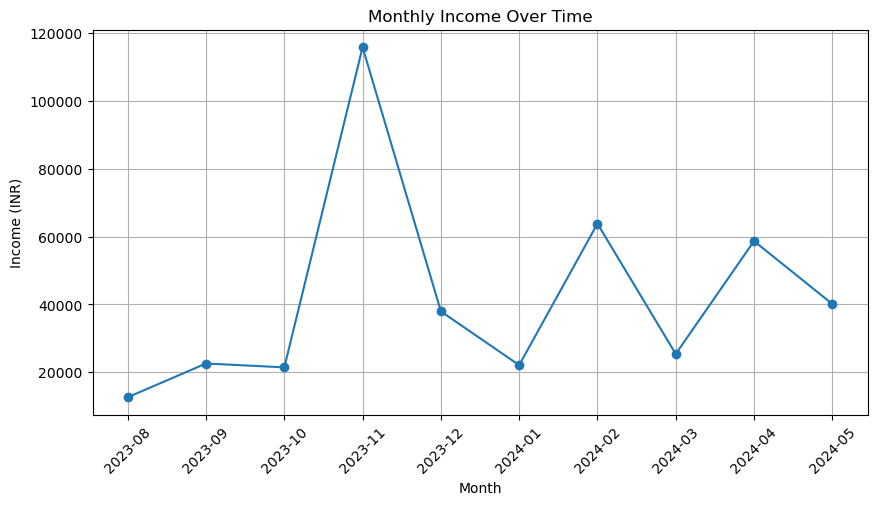

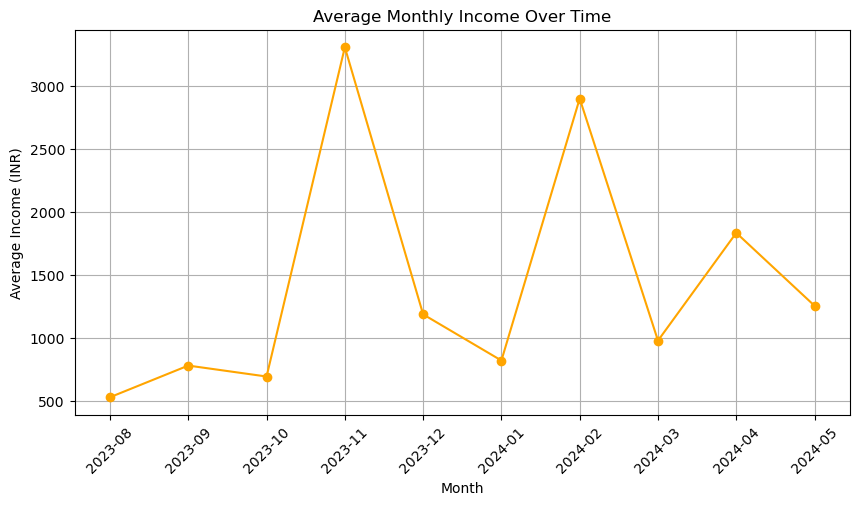

In [30]:
# Display monthly income pattern
print("Monthly Income Pattern:")
print(monthly_income)

# Plot monthly income pattern
plt.figure(figsize=(10, 5))
plt.plot(monthly_income.index.astype(str), monthly_income['amount'], marker='o')
plt.title('Monthly Income Over Time')
plt.xlabel('Month')
plt.ylabel('Income (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

# Plot average monthly income
plt.figure(figsize=(10, 5))
plt.plot(monthly_income.index.astype(str), monthly_income['average'], marker='o', color='orange')
plt.title('Average Monthly Income Over Time')
plt.xlabel('Month')
plt.ylabel('Average Income (INR)')
plt.grid(True)
plt.xticks(rotation=45)
plt.show()

## 5.  Alert Generation: 
   - Identify any unusual or suspicious transactions.
   - Generate alerts for low balance or high expenditure periods.


In [31]:
# Ensure 'amount' column is of type float
df['amount'] = df['amount'].astype(float)

# Ensure 'currentBalance' column is of type float
df['currentBalance'] = df['currentBalance'].astype(float)

In [32]:
# Remove rows where the conversion failed and resulted in NaT
df = df.dropna(subset=['transactionTimestamp'])

In [33]:
# Identify unusual or suspicious transactions
# Define a threshold for suspicious transactions (e.g., transactions greater than a certain amount)
suspicious_threshold = 50000  # Example threshold amount

suspicious_transactions = df[df['amount'] > suspicious_threshold]
print("Suspicious Transactions:")
print(suspicious_transactions)

Suspicious Transactions:
Empty DataFrame
Columns: [type, mode, amount, currentBalance, transactionTimestamp, valueDate, txnId, narration, reference]
Index: []


In [34]:
# Generate alerts for low balance periods
# Define a threshold for low balance
low_balance_threshold = 1000  # Example low balance threshold

In [35]:
low_balance_alerts = df[df['currentBalance'] < low_balance_threshold]
print("Low Balance Alerts:")
print(low_balance_alerts)

Low Balance Alerts:
       type    mode  amount  currentBalance       transactionTimestamp  \
4     DEBIT     ATM  1000.0          525.80  2023-08-07T17:13:13+05:30   
5     DEBIT     UPI     1.0          524.80  2023-08-22T08:05:06+05:30   
18    DEBIT     UPI  1450.0          794.80  2023-08-25T10:39:35+05:30   
19    DEBIT     UPI   120.0          674.80  2023-08-25T12:03:11+05:30   
26    DEBIT     UPI  1000.0          175.80  2023-08-25T16:56:59+05:30   
..      ...     ...     ...             ...                        ...   
980   DEBIT     UPI    80.0           23.41  2024-05-29T17:57:40+05:30   
981  CREDIT  OTHERS   938.0          961.41  2024-05-30T05:07:05+05:30   
982   DEBIT     UPI    60.0          901.41  2024-05-30T09:58:24+05:30   
983   DEBIT     UPI   130.0          771.41  2024-05-30T13:30:30+05:30   
984   DEBIT     UPI    10.0          761.41  2024-05-30T13:38:20+05:30   

      valueDate      txnId                                          narration  \
4    2023-

In [36]:
# Generate alerts for high expenditure periods
# Define a threshold for high expenditure (e.g., sum of expenditures in a day or week)
high_expenditure_threshold = 100000  # Example high expenditure threshold

In [37]:
# Extract debit transactions
debit_df = df[df['type'] == 'DEBIT']

In [38]:
# Convert transaction timestamp to datetime in debit transactions
debit_df['transactionTimestamp'] = pd.to_datetime(debit_df['transactionTimestamp'], errors='coerce')

C:\Users\Taranjeet Kaur\AppData\Local\Temp\ipykernel_13352\1135448774.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  debit_df['transactionTimestamp'] = pd.to_datetime(debit_df['transactionTimestamp'], errors='coerce')


In [39]:
# Remove rows where the conversion failed and resulted in NaT
debit_df = debit_df.dropna(subset=['transactionTimestamp'])

In [40]:
# Group by day and calculate total expenditure
debit_df['day'] = debit_df['transactionTimestamp'].dt.date
daily_expenditure = debit_df.groupby('day').agg({'amount': 'sum'}).reset_index()

In [41]:
# Generate alerts for high daily expenditure
high_expenditure_alerts = daily_expenditure[daily_expenditure['amount'] > high_expenditure_threshold]
print("High Expenditure Alerts:")
print(high_expenditure_alerts)

High Expenditure Alerts:
Empty DataFrame
Columns: [day, amount]
Index: []


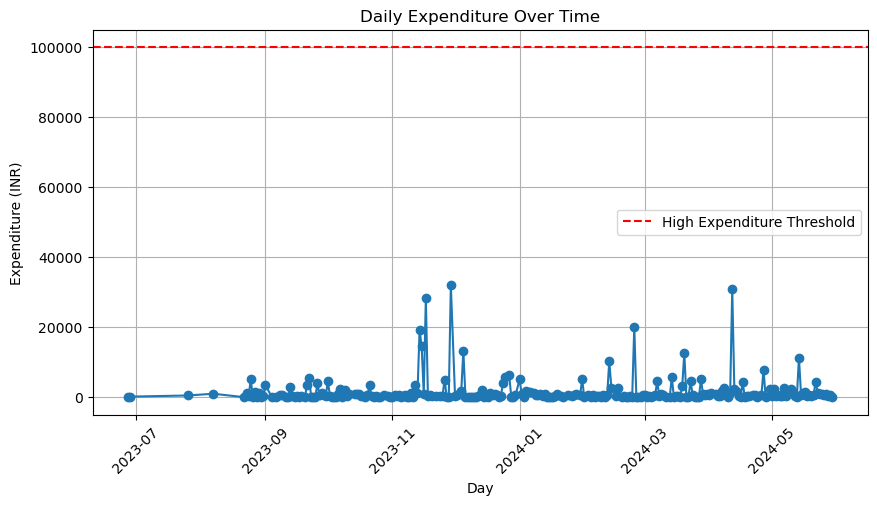

In [42]:
# Plot daily expenditure
plt.figure(figsize=(10, 5))
plt.plot(daily_expenditure['day'], daily_expenditure['amount'], marker='o')
plt.axhline(high_expenditure_threshold, color='red', linestyle='--', label='High Expenditure Threshold')
plt.title('Daily Expenditure Over Time')
plt.xlabel('Day')
plt.ylabel('Expenditure (INR)')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.show()